In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Mathew Stev Hernandez Marin
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



los valores de los cosenos en el intervalo son
[ 1.          0.76604444  0.17364818 -0.5        -0.93969262 -0.93969262
 -0.5         0.17364818  0.76604444  1.        ]

los errores cuando h crece son
[array([8.8880181e-11]), array([3.10148907e-10]), array([8.69436745e-11]), array([5.95101746e-12]), array([3.49143492e-11]), array([8.76265727e-12]), array([1.36535228e-12]), array([5.07593967e-13]), array([2.36677344e-12]), array([2.43738363e-12]), array([9.28368493e-13]), array([5.42899059e-14]), array([3.35842465e-13]), array([3.70681263e-12]), array([4.26427782e-11]), array([4.88070695e-10]), array([5.66618591e-09]), array([6.71697128e-08]), array([8.23451543e-07]), array([1.05960471e-05])]

el valor de la derivada en el punto solicitado es
[-0.38267284]
minimo de los errores es [5.42899059e-14]


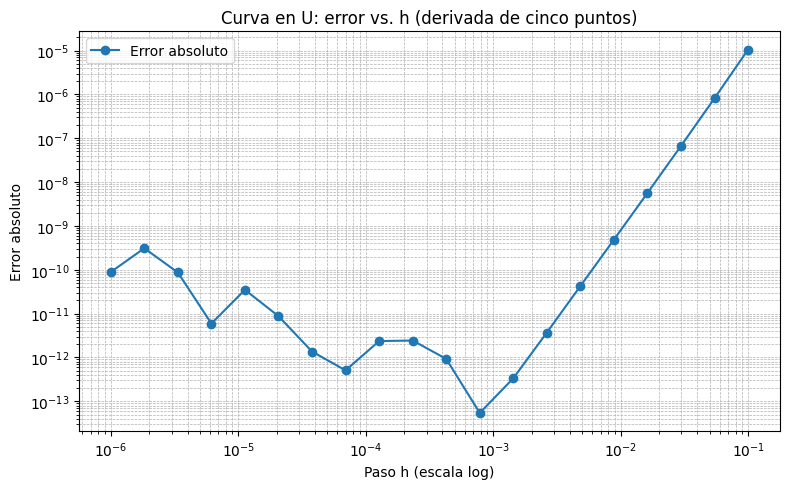

In [1]:
import numpy as np #importo numpy para realizar los calculos
import sympy as sp
import matplotlib.pyplot as plt
grados= np.linspace(0,2*np.pi,10)#defino un array equiespaciado entre 0 y 2pi con 10 datos
grado = [np.pi/8]
h= 0.0009
f= lambda x: np.cos(x)
fprime_exact= lambda x: -np.sin(x)

#hago un arreglo de valores para el error de h
valores_de_h = np.logspace(-6, -1, 20)

def five_point_derivative(f,x,h):#defino la función y hago que me devuelva el valor calculado usando la formula de la derivada de 5 puntos
  n = len(x)
  fprime=np.zeros_like(x)

  for i in range(n):
    if i == 0:
      fprime[i]= (-25*f(x[i]) + 48*f(x[i] + h) - 36 * f(x[i]+2*h) +16*f(x[i]+ 3*h) - 3*f(x[i]+4*h))/ (12*h)
    elif i== n-1:
      fprime[i] = (25*f(x[i]) - 48*f(x[i]-h) + 36 * f(x[i]-2*h) -16 * f(x[i]-3*h) + 3*f(x[i]-4*h))/ (12*h)
    else:
       fprime[i]=(-f(x[i] + 2*h) + 8*f(x[i] + h) - 8*f(x[i] - h) + f(x[i] - 2*h)) / (12*h)
  return fprime
#creo una lista donde poder meter los errores
errores=[]
#hago un for para los distintos valores de h que me calcule los errores usando la funcion real
for h in valores_de_h:
  aprox= five_point_derivative(f,grado,h)
  real= fprime_exact(grado)
  error= abs(aprox-real)
  errores.append(error)
print(f"los valores de los cosenos en el intervalo son")
print(f(grados))
print("")
print(f"los errores cuando h crece son")
print(errores)
print("")
print(f"el valor de la derivada en el punto solicitado es")
print(five_point_derivative(f,grado,h))
print(f"minimo de los errores es {min(errores)}")

# se logra observar que no es absoluto a su tamaño si no a un h especifico en el cual el valor del error es minimo
plt.figure(figsize=(8, 5))
plt.loglog(valores_de_h, errores, 'o-', label="Error absoluto")
plt.xlabel("Paso h (escala log)")
plt.ylabel("Error absoluto")
plt.title("Curva en U: error vs. h (derivada de cinco puntos)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#segunda derivada
h=0.05
f =lambda x: np.cos(x)
x= np.pi/8
def second_diff(f, x, h):
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
f_prime2_exact= lambda x: -np.cos(x)
valores_de_h = np.logspace(-5, -1, 10)
errores=[]
for h in valores_de_h:
  aprox= second_diff(f,x,h)
  exact= f_prime2_exact(x)
  error= abs(aprox-exact)
  errores.append(error)
errores=str(errores)
print(second_diff(f,x,0.05))
print("")
print(errores)

-0.9236870736474943

[np.float64(3.2899170954170387e-07), np.float64(1.6339641173424013e-07), np.float64(1.4163556327773108e-08), np.float64(5.638558508991309e-09), np.float64(2.7827468884744633e-08), np.float64(2.1426282370562433e-07), np.float64(1.658696450301811e-06), np.float64(1.2842628372977671e-05), np.float64(9.943207770146678e-05), np.float64(0.0007696430230486051)]


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

la derivada en el intervalo es [16.93901282 18.87409399 21.0140081  23.37945195 25.99314894 28.88004307] y la segunda derivada en el intervalo es [22.98895277 25.42791999 28.11368778 31.07044826 34.32471134 37.90552299]
las derivadas cambiando el h son[array([22.1671683]), array([22.16716808]), array([22.16716527]), array([22.16715354]), array([22.16712206]), array([22.16705505]), array([22.16693128]), array([22.16672358]), array([22.16639827]), array([22.16591457])] y las segundas derivadas cambiando el h son[array([29.55622809]), array([29.55675641]), array([29.55817885]), array([29.56049549]), array([29.56370649]), array([29.56781205]), array([29.57281244]), array([29.57870798]), array([29.58549906]), array([29.5931861])]
Segundo valor de la derivada: [array([22.1671683]), array([22.16716808]), array([22.16716527]), array([22.16715354]), array([22.16712206]), array([22.16705505]), array([22.16693128]), array([22.16672358]), array([22.16639827]), array([22.16591457])]
Segundo valor d

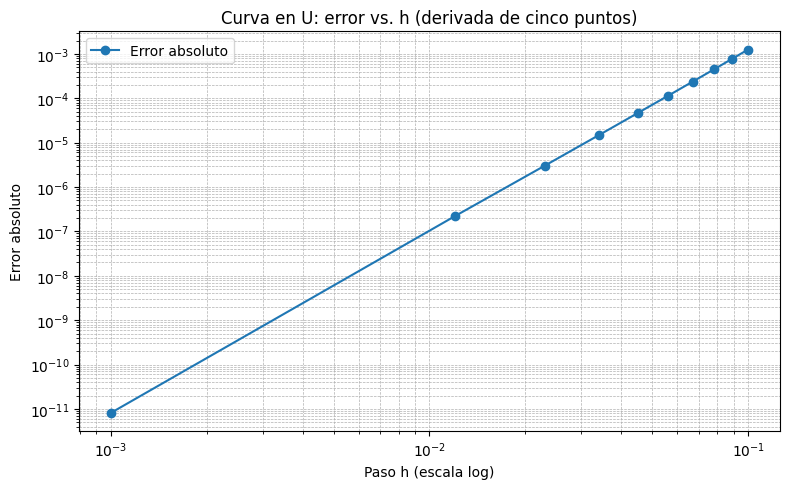

El valor óptimo de h es: 0.00100


In [26]:
import numpy as np
def five_point_derivative(f,x,h):#defino la función y hago que me devuelva el valor calculado usando la formula de la derivada de 5 puntos, aunque como ya está definida este punto no es necesario
  n = len(x)
  fprime=np.zeros_like(x)

  for i in range(n):
    if i == 0:
      fprime[i]= (-25*f(x[i]) + 48*f(x[i] + h) - 36 * f(x[i]+2*h) +16*f(x[i]+ 3*h) - 3*f(x[i]+4*h))/ (12*h)
    elif i== n-1:
      fprime[i] = (25*f(x[i]) - 48*f(x[i]-h) + 36 * f(x[i]-2*h) -16 * f(x[i]-3*h) + 3*f(x[i]-4*h))/ (12*h)
    else:
       fprime[i]=(-f(x[i] + 2*h) + 8*f(x[i] + h) - 8*f(x[i] - h) + f(x[i] - 2*h)) / (12*h)
  return fprime
def second_diff(f, x, h): #lo mismo
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
x=np.array([2.0])
f = lambda x: x * np.exp(x)
fprime_exact= lambda x: (1+x)* np.exp(x)
fprime2_exact = lambda x: (2+x)*np.exp(x)
intervalo= np.linspace(1.8,2.2,6)
valores= np.linspace(0.001,0.1,10)
print(f"la derivada en el intervalo es {five_point_derivative(f,intervalo,0.01)} y la segunda derivada en el intervalo es {second_diff(f,intervalo,0.01)}")
derivadas=[]
derivadas2=[]
for h in valores:
  derivada= five_point_derivative(f,x,h)
  derivada2= second_diff(f,x,h)
  derivadas.append(derivada)
  derivadas2.append(derivada2)
print(f"las derivadas cambiando el h son{derivadas} y las segundas derivadas cambiando el h son{derivadas2}")
print(f"Segundo valor de la derivada: {derivadas}")
print(f"Segundo valor de la segunda derivada: {derivadas2}")

errores=[]

for h in valores:
  aprox= five_point_derivative(f,x,h)[0]
  real= fprime_exact(x[0])
  error= abs(aprox-real)
  errores.append(error)

plt.figure(figsize=(8, 5))
plt.loglog(valores, errores, 'o-', label="Error absoluto")
plt.xlabel("Paso h (escala log)")
plt.ylabel("Error absoluto")
plt.title("Curva en U: error vs. h (derivada de cinco puntos)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
h_optimo = valores[np.argmin(errores)]
print(f"El valor óptimo de h es: {h_optimo:.5f}")


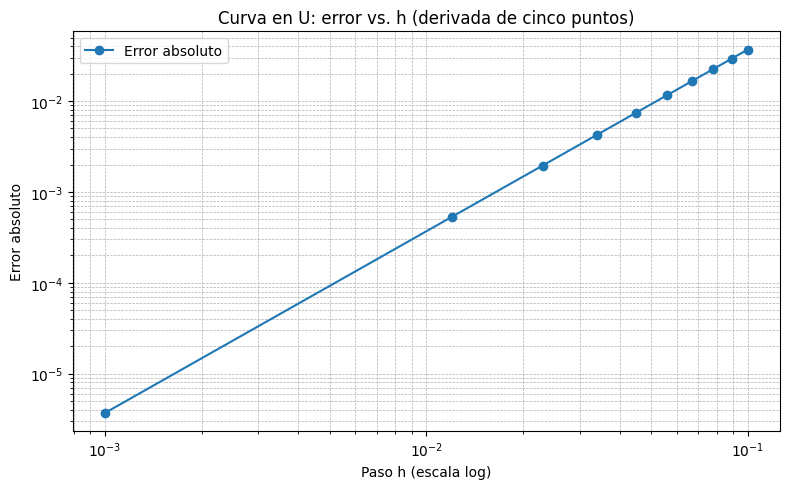

El valor óptimo de h es: 0.00100


In [28]:
errores=[]

for h in valores:
  aprox= second_diff(f,x,h)[0]
  real= fprime2_exact(x[0])
  error= abs(aprox-real)
  errores.append(error)

plt.figure(figsize=(8, 5))
plt.loglog(valores, errores, 'o-', label="Error absoluto")
plt.xlabel("Paso h (escala log)")
plt.ylabel("Error absoluto")
plt.title("Curva en U: error vs. h (derivada de cinco puntos)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

h_optimo = valores[np.argmin(errores)]
print(f"El valor óptimo de h es: {h_optimo:.5f}")

In [29]:
import numpy as np
f = lambda x: x * np.exp(x)
x_intervalo = np.linspace(1.8, 2.2, 6)
y_intervalo = f(x_intervalo)
dy_dx = np.gradient(y_intervalo, x_intervalo)
d2y_dx2 = np.gradient(dy_dx, x_intervalo)
valor_gradiente = dy_dx[3]
valor_gradiente_2 = d2y_dx2[3]
gradient_derivatives = [valor_gradiente] * 10
gradient_second_derivatives = [valor_gradiente_2] * 10
print("Derivadas con np.gradient:", gradient_derivatives)
print("Segundas derivadas con np.gradient:", gradient_second_derivatives)
 #no supe como hacer que los plots no quedaran tan feos, tienen los datos, pero están horribles

Derivadas con np.gradient: [np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177), np.float64(23.420815163693177)]
Segundas derivadas con np.gradient: [np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199), np.float64(31.16926985344199)]
